## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [11]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## MINIST

In this chapter, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [1]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. 

This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 

Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [24]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

In [25]:
some_digit_image.shape

(28, 28)

In [26]:
some_digit.shape

(784,)

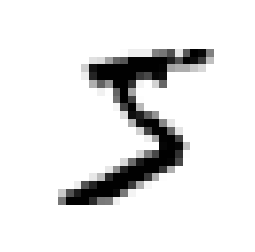

In [27]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [28]:
y[0]

5

In [29]:
import numpy as np

In [30]:
y = y.astype(np.uint8)

In [31]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

Okay, now let’s pick a classifier and train it. 

A good place to start is with a **Stochastic Gradient Descent (SGD)** classifier, using Scikit-Learn’s **SGDClassifier** class. 

This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning), as we will see later. Let’s create an SGDClassifier and train it on the whole training set:

In [32]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [33]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

*Note*: The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

In [38]:
y_train_5[0]

True

In [39]:
sgd_clf.predict([some_digit])

array([False])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [41]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [42]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct/ len(y_pred))    
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9532


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.95125


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9625


The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to produce folds that contain a representative ratio of each class. 

At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

Let’s use the cross_val_score() function to evaluate your SGDClassifier model using K-fold cross-validation, with three folds. 

Remember that K-fold cross-validation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds (see Chapter 2):

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.9532 , 0.95125, 0.9625 ])

Wow! Above 93% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [45]:
from sklearn.base import  BaseEstimator

In [48]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [49]:
never_5_clf = Never5Classifier()

In [50]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=5, scoring='accuracy')

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with *skewed* datasets (i.e., when some classes are much more frequent than others).

### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. 

**The general idea is to count the number of times instances of class A are classified as class B**. 

For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.



In [51]:
from sklearn.model_selection import cross_val_predict

In [52]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

Just like the `cross_val_score()` function, `cross_val_predict()` performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. 

This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).

In [53]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

Now you are ready to get the confusion matrix using the `confusion_matrix()` function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
confusion_matrix(y_train_5, y_train_pred)

array([[52992,  1587],
       [ 1074,  4347]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

- The first row of this matrix considers non-5 images (the *negative class*): 52,992 of them were correctly classified as non-5s (they are called *true negatives*), while the remaining 1,587 were wrongly classified as 5s (*false positives*). 
- The second row considers the images of 5s (the *positive class*): 1,074 were wrongly classified as non-5s (*false negatives*), while the remaining 4,347 were correctly classified as 5s (*true positives*). 

A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):



In [56]:
y_train_perfect_prediction = y_train_5

In [57]:
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the **precision** of the classifier:

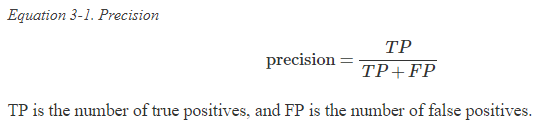

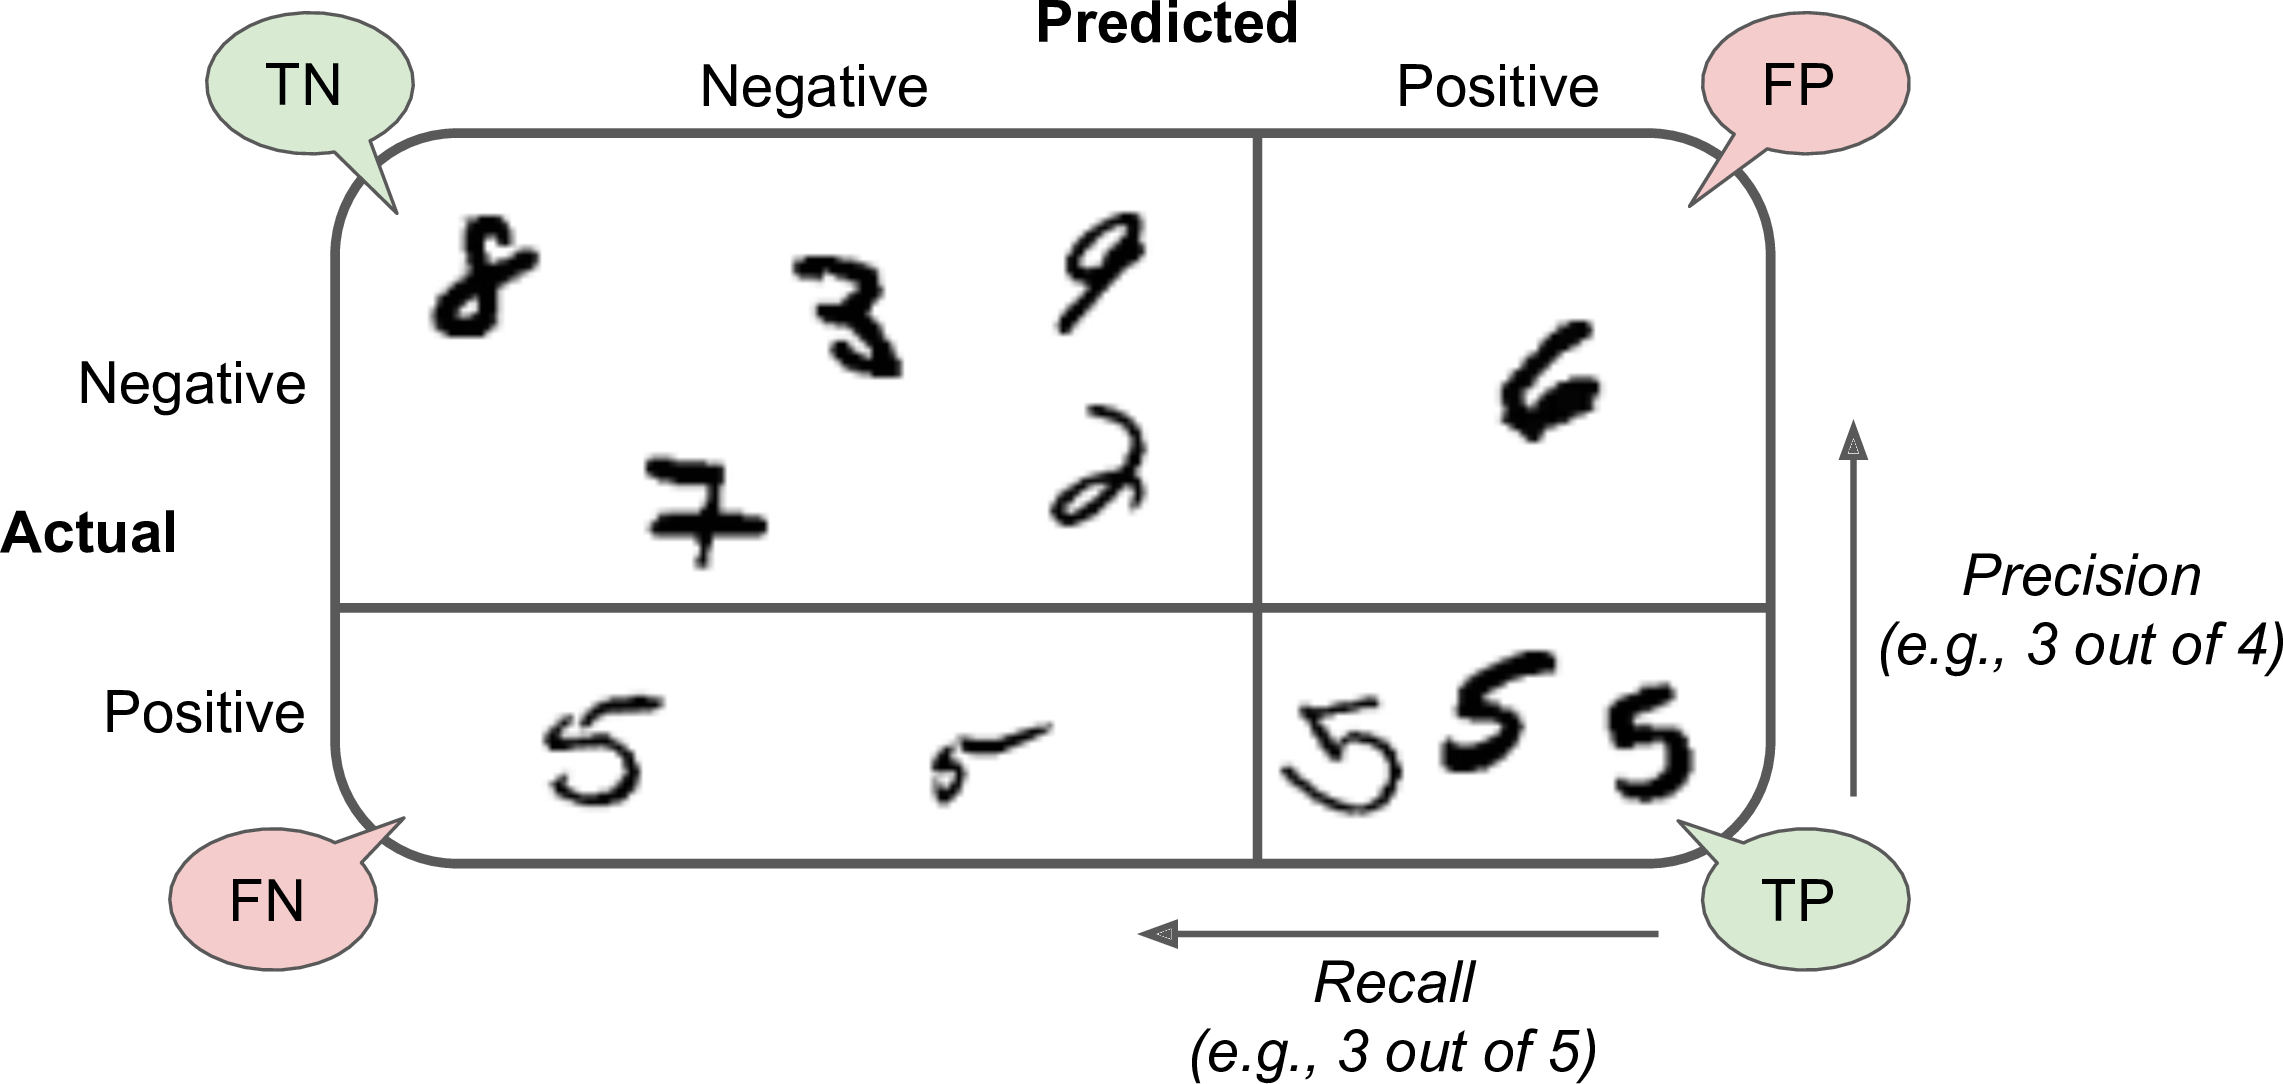

### Precision and Recall

In [58]:
from sklearn.metrics import  precision_score, recall_score

In [59]:
precision_score(y_train_5, y_train_pred)

0.7325581395348837

In [60]:
recall_score(y_train_5, y_train_pred)

0.8018815716657444

Now your 5-detector does not look as shiny as it did when you looked at its accuracy. 

When it claims an image represents a 5, it is correct only 73.2% of the time. Moreover, it only detects 80.2% of the 5s.

Để cho tiện, người ta thường kết hợp cả *precision* và *recall* vào trong 1 metric tên là **F1 score**, nhất là khi muốn so sánh 2 classifier.

F1 score là *harmonic mean* của precision và recall (Equation 3-3). Nếu như "*regular mean*" coi mọi giá trị là bình đẳng, thì *harmonic mean* đặt trọng số cao hơn cho giá trị thấp hơn. 

Kết quả là trong 2 classifer, classifer nào cao chỉ khi có cả recall và precision cao.

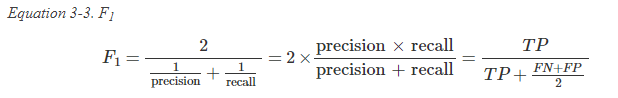

Để tính F1 score, chỉ cần gọi hàm `f1_score()`

In [2]:
from sklearn.metrics import f1_score

In [3]:
f1_score(y_train_5, y_train_pred)

NameError: name 'y_train_5' is not defined

The F1 score "hậu thuẫn" cho classifier có precision và recall gần gần nhau. 

Đây không phải là thứ lúc nào cũng mong muốn. Ở một vài trường hợp, ta quan tâm nhiều hơn đến precision, các trường hợp khác thì lại chỉ recall. 

Ví dụ: nếu ta train một classifer detect video an toàn cho trẻ nhỏ, ta sẽ thích classifer đó loại bỏ những video tốt (low recall), giữ lại những video an toàn (high precision), hơn là classifer có recall cao (giữ lại bad bad videos).

Nếu recall cao, precision thấp, thì số lượng FN ít hơn số lượng FP, tức là số video good bị đoán thành bad ít hơn số lượng video bad bị đoán thành good. 

Nếu recall thấp, precision cao, thì số lượng FN nhiều hơn số lượng FP, tức là số lượng good video bị đoán thành bad nhiều hơn số lượng video bad bị đoán thành good. 

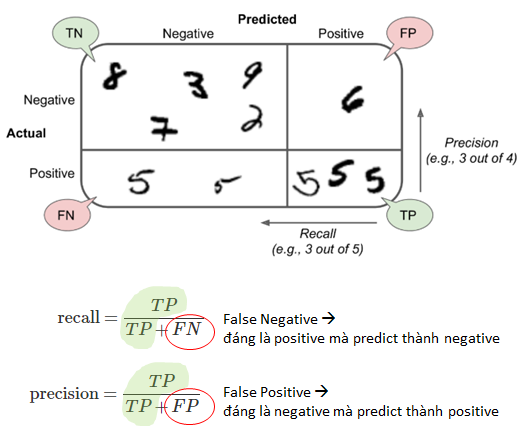

Ngược lại, nếu train classifer để detect trộm cắp vặt trong cửa hàng: thì có thể sẽ ổn nếu classifer chỉ có precision là 30% trong khi recall là 90% (bảo vệ sẽ nhận nhièu báo động giả, nhưng hầu hết kẻ trộm sẽ bị bắt).

Rất tiếc là chúng ta không thể có cả 2 điều trên: tăng precision sẽ giảm recall, và ngược lại. Đây được gọi là "precision/recall tradeoff".



### Precision/ Recall Tradeoff

Để hiểu về tradeoff này, hãy xem cách mà SGDClassifier đưa ra quyết định phân loại.

Với mỗi instance, SGDClassifier:
- tính ra 1 score dựa trên một *decision function*, 
- nếu score trên lớn hơn 1 ngưỡng nào đó (threshold), nó để instance kia vào *positive class*, còn không thì cho vào *negative class*. 

Figure 3-3 cho ví dụ một vài chữ số đặt trên trục ngang, chữ bên trái ứng với score thấp, chữ bên phải ứng với score cao. 

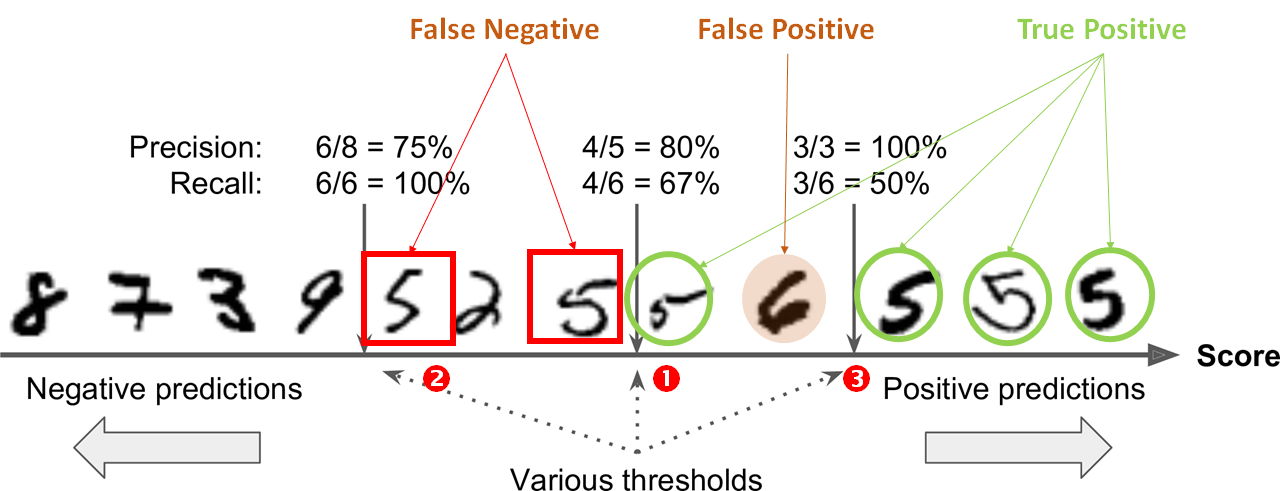

Giả sử rằng "ngưỡng 1" là điểm chính giữa trục (nằm giữa 2 số 5). Ta sẽ thấy là: 
- bên phải của ngưỡng 1: có 4 *true positives* (nghĩa là đúng là chữ số 5), và 1 *false positive* (không phải 5 mà lại đoán là 5, thực chất là 6). 
- Vậy precision là 80% (4/5)
- bên trái của ngưỡng 1: có 2 *false negative* (nghĩa là đúng là số 5 mà lại bảo không phải). 
- Vậy recall là 4/(4+2) = 4/6 hay 67%. 

Nếu ta tăng giá trị của ngưỡng lên, từ điểm 1 dịch sang điểm 3, thì *false positive* (đang là chữ số 6) biến thành *true negative*, nghĩa là *precision* tăng (thành 100%), nhưng một *true positive* biến thành *false negative*, giảm *recall* xuống 50%. 

Ngược lại, giảm ngưỡng sẽ làm tăng recall, và giảm precision.

Figure 3-4. Precision and recall versus the decision threshold

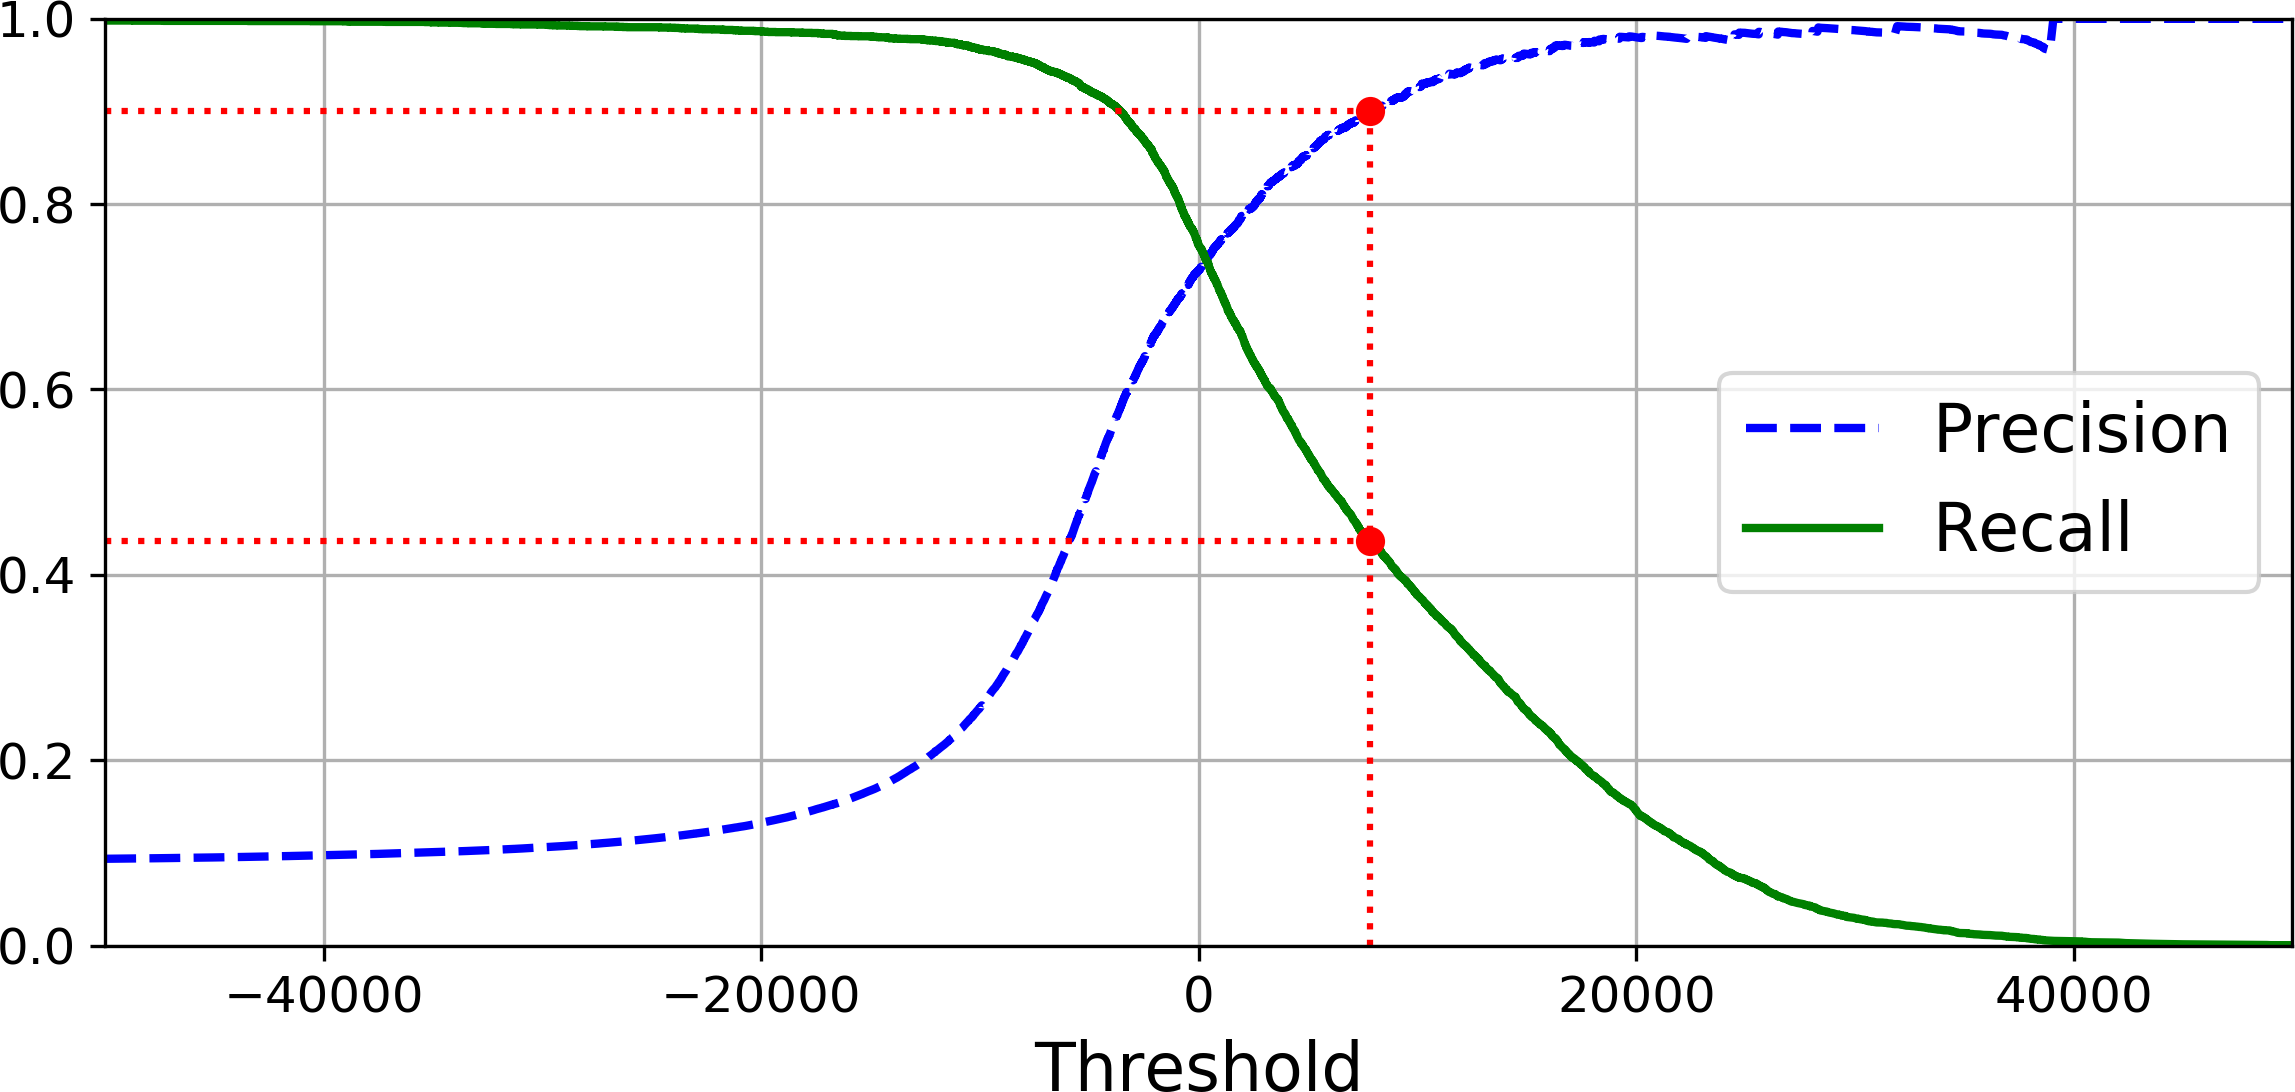

You may wonder why the precision curve is bumpier than the recall curve in Figure 3-4. The reason is that precision may sometimes go down when you raise the threshold (although in general it will go up). To understand why, look back at Figure 3-3 and notice what happens when you start from the central threshold and move it just one digit to the right: precision goes from 4/5 (80%) down to 3/4 (75%). On the other hand, recall can only go down when the threshold is increased, which explains why its curve looks smooth.


Figure 3-5. Precision versus recall


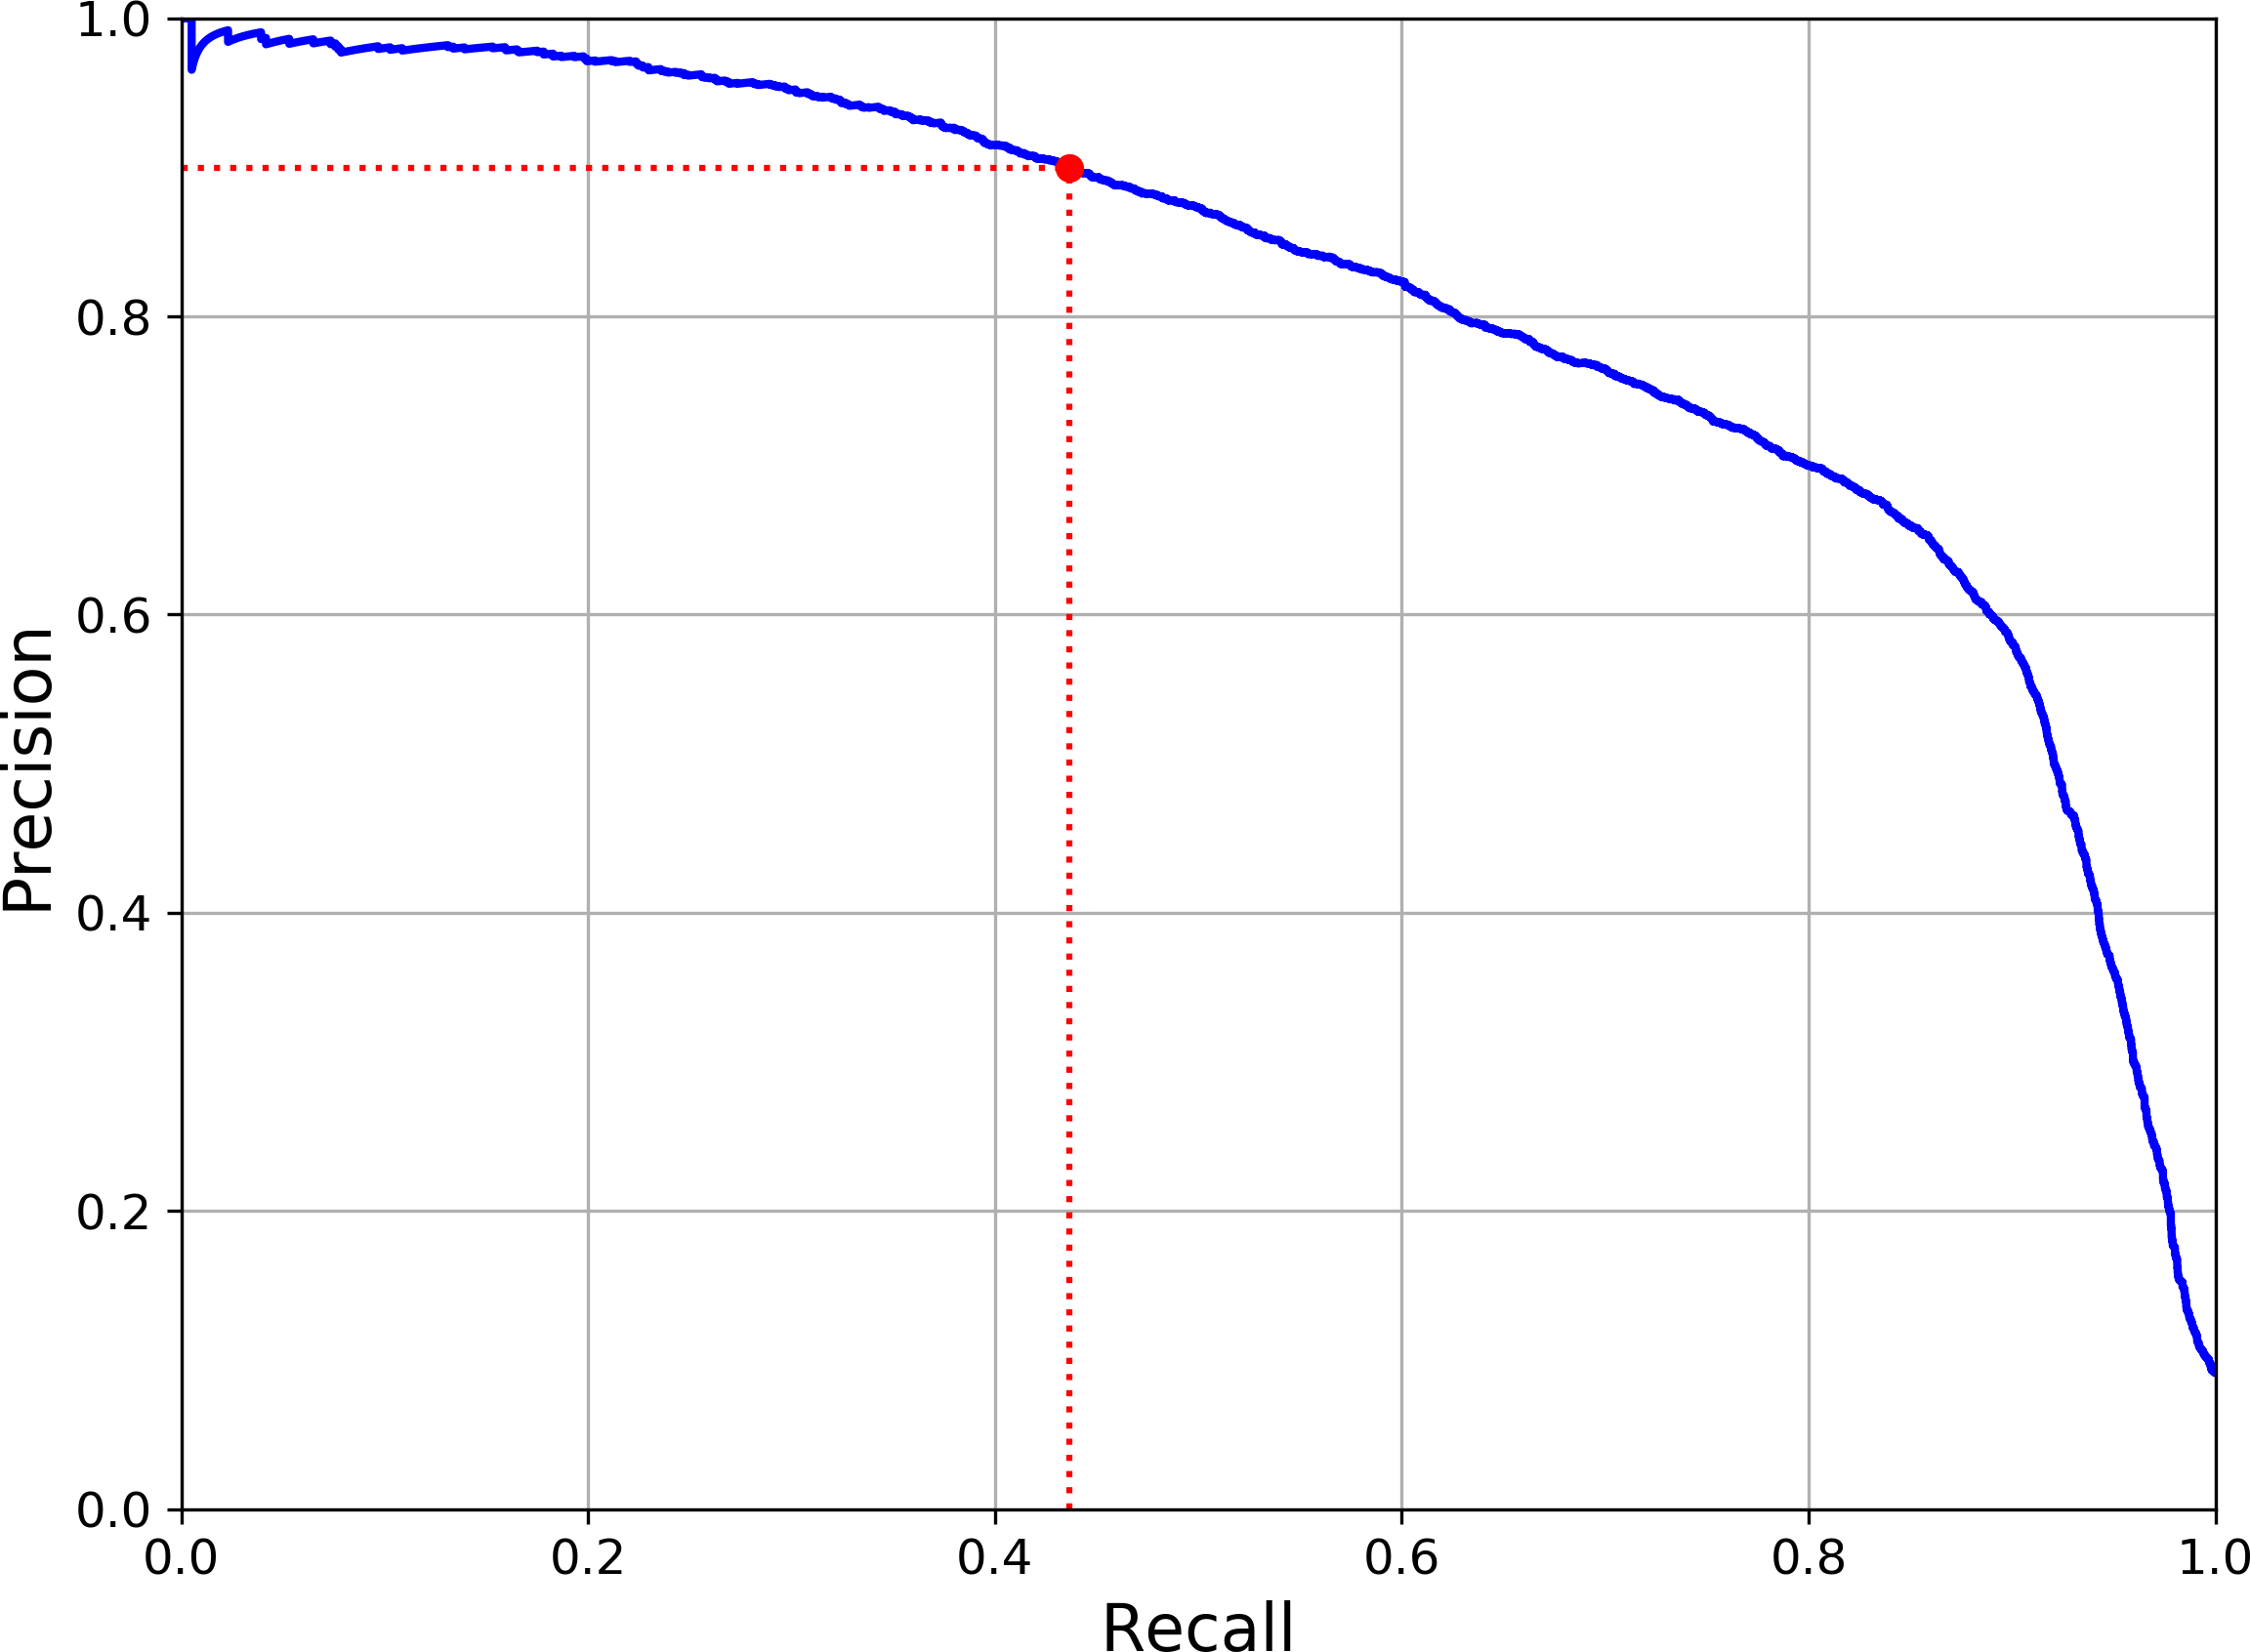

### The ROC Curve

The *receiver operating characteristic* (ROC) curve is another common tool used with binary classifiers. 

It is very similar to the precision/recall curve, but instead of plotting precision versus recall, **the ROC curve plots the true positive rate (another name for recall) against the false positive rate (FPR)**. 

The **FPR is the ratio of negative instances that are incorrectly classified as positive**. It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative. 

The **TNR is also called specificity**. 

Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.



Figure 3-6. ROC curve


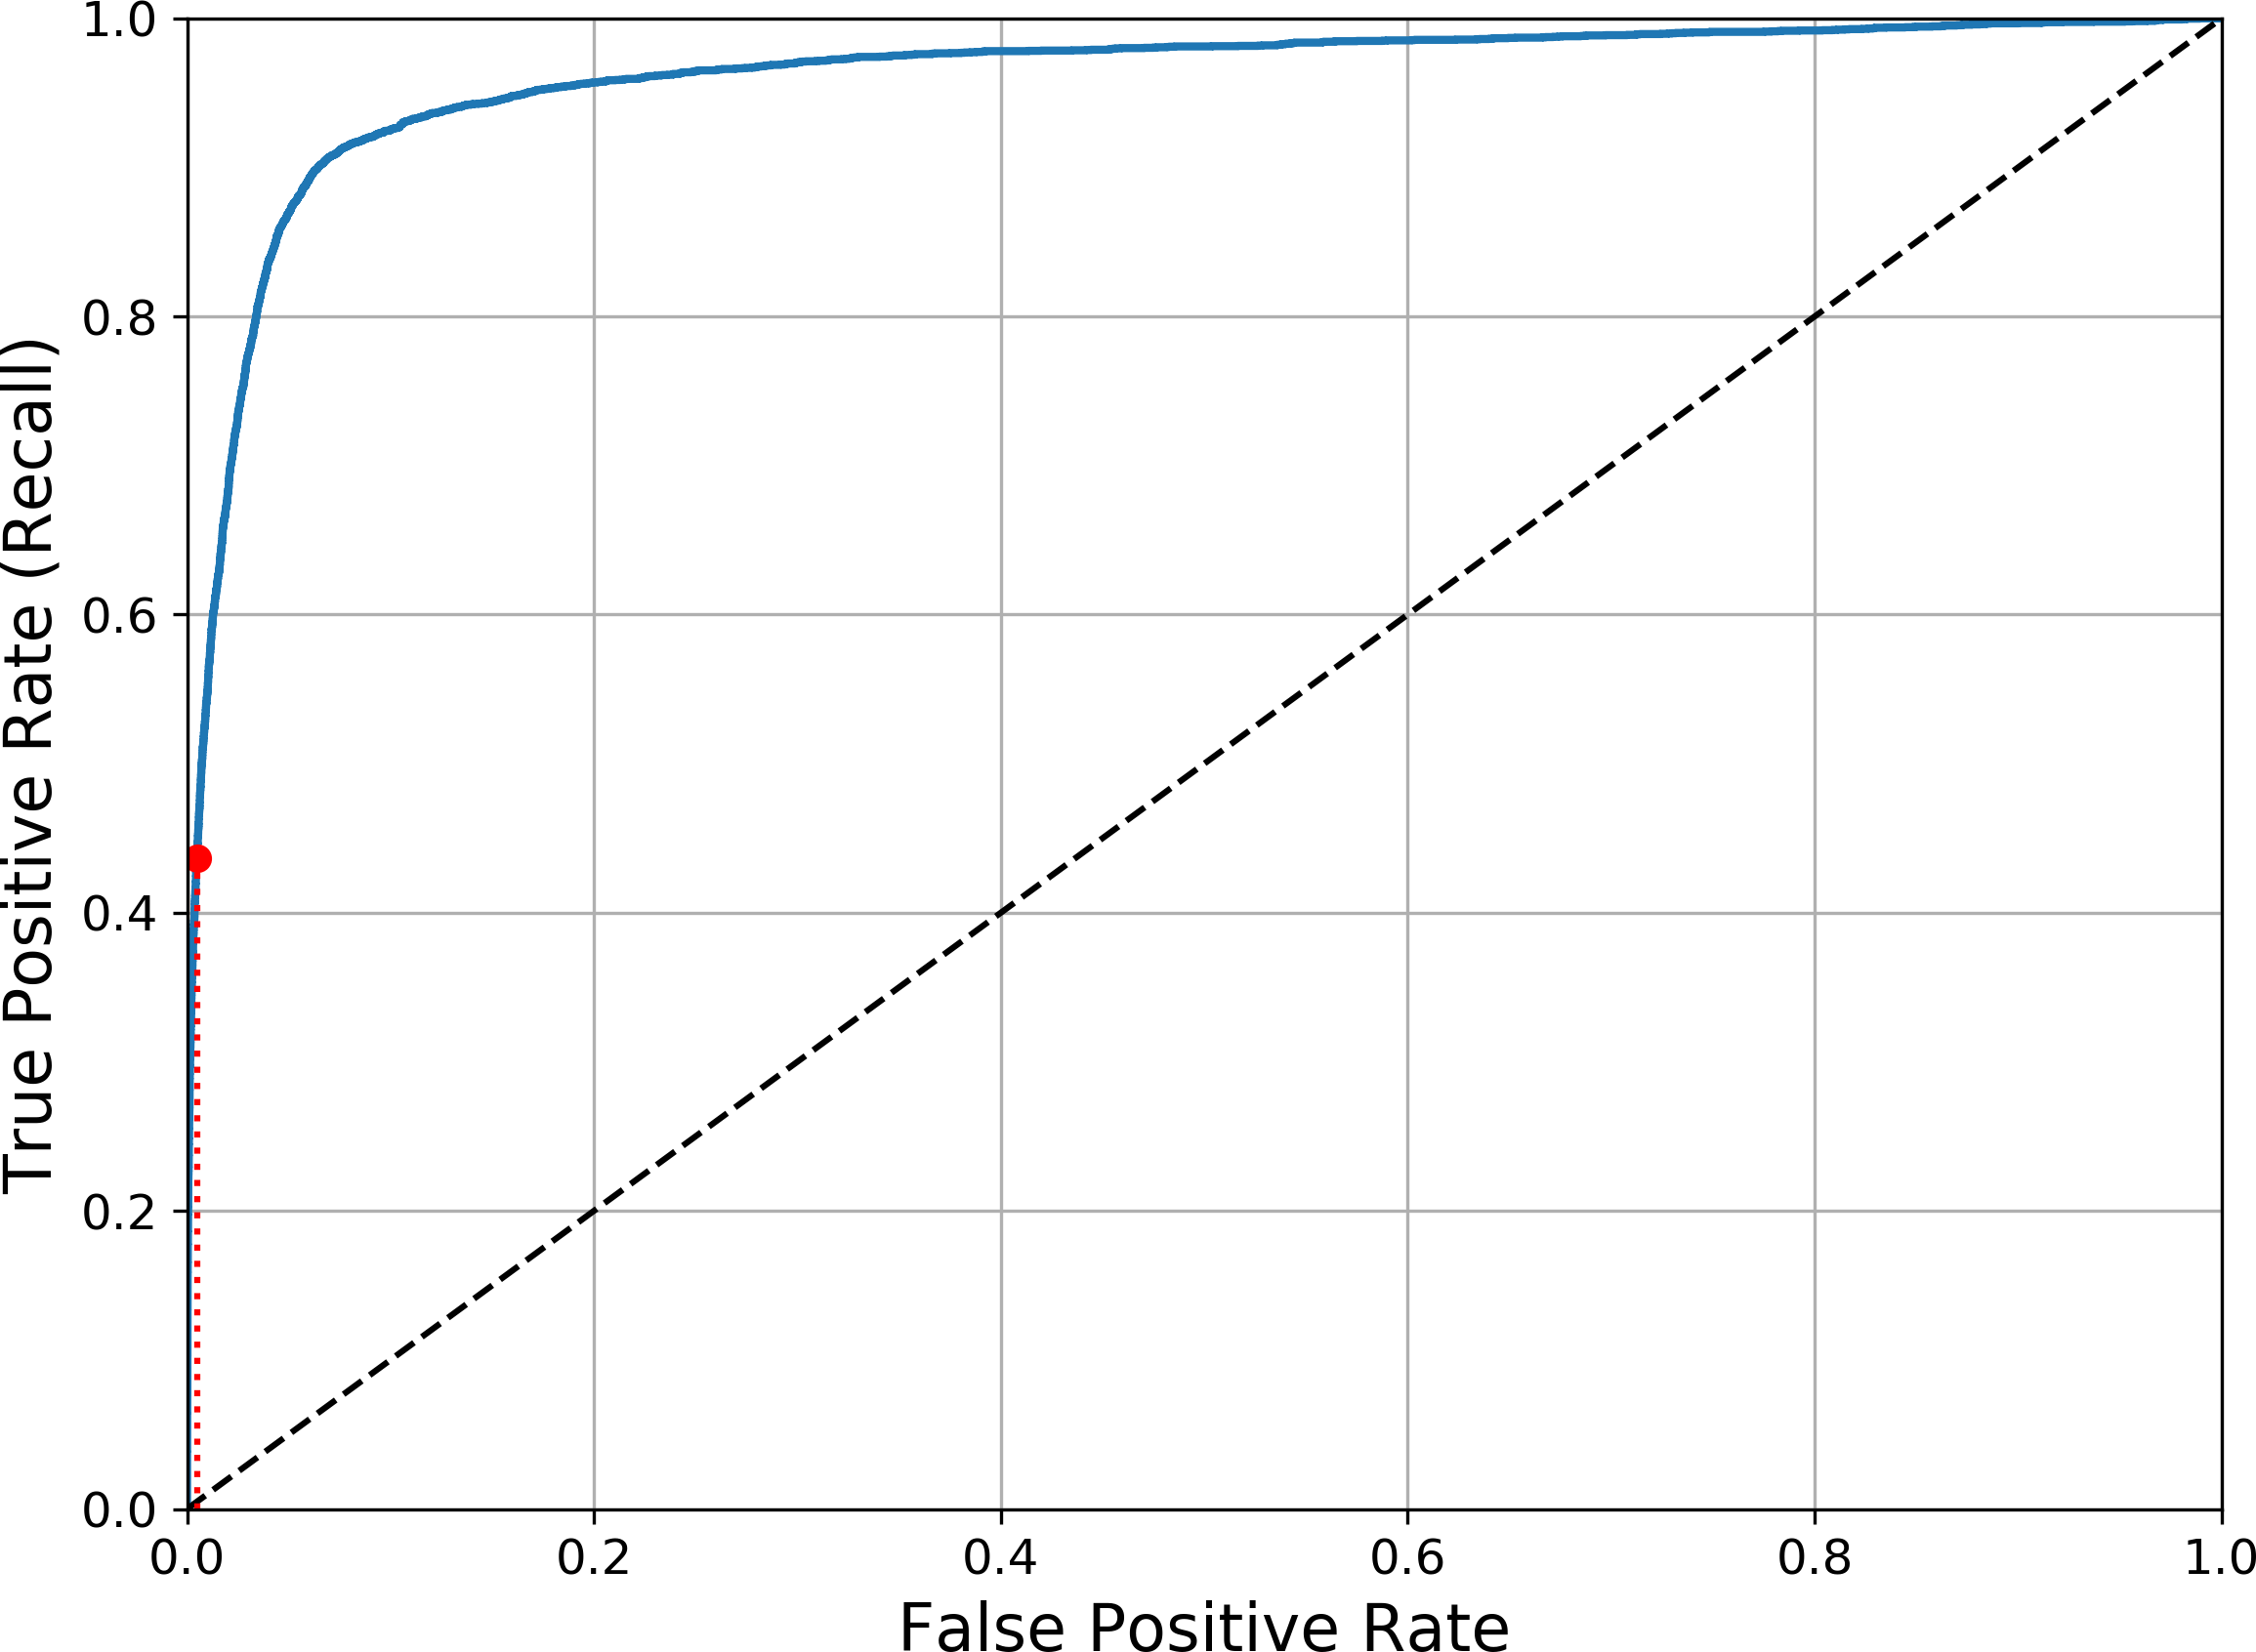

One way to compare classifiers is to measure the **area under the curve (AUC)**. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn provides a function to compute the ROC AUC:

*Note*: **Which metric to be used?**

Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. 

As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise. 

For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

## Multiclass Classification

## Error Analysis

## Multilabel Classification

## Multioutput Classification